In [2]:
import pandas as pd

# Load the dataset
cars_data = pd.read_csv('cars_data_10_cleaning.csv')

# Selected columns for outlier detection
selected_cols = ['accelerationTime', 'cargoVolume' ,'engineCapacity', 'fuelConsumption', \
    'price', 'curbWeight', 'emissionsCO2', 'engineCapacity', 'fuelCapacity', 'height',\
     'width' ,'length', 'modelDate', 'numberOfForwardGears', 'payload', 'roofLoad', 'seatingCapacity', 'speed', 'torque' ]

outlier_counts = {}

# Counting outliers using 3 times the IQR
for col in selected_cols:
    Q1 = cars_data[col].quantile(0.25)
    Q3 = cars_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ((cars_data[col] < lower_bound) | (cars_data[col] > upper_bound))
    outlier_counts[col] = outliers.sum()

# Printing the number of outliers for each column
print("Number of outliers per feature:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count}")

Number of outliers per feature:
accelerationTime: 0
cargoVolume: 437
engineCapacity: 883
fuelConsumption: 23
price: 581
curbWeight: 36
emissionsCO2: 22
fuelCapacity: 0
height: 1213
width: 5
length: 0
modelDate: 0
numberOfForwardGears: 0
payload: 393
roofLoad: 238
seatingCapacity: 3857
speed: 0
torque: 39


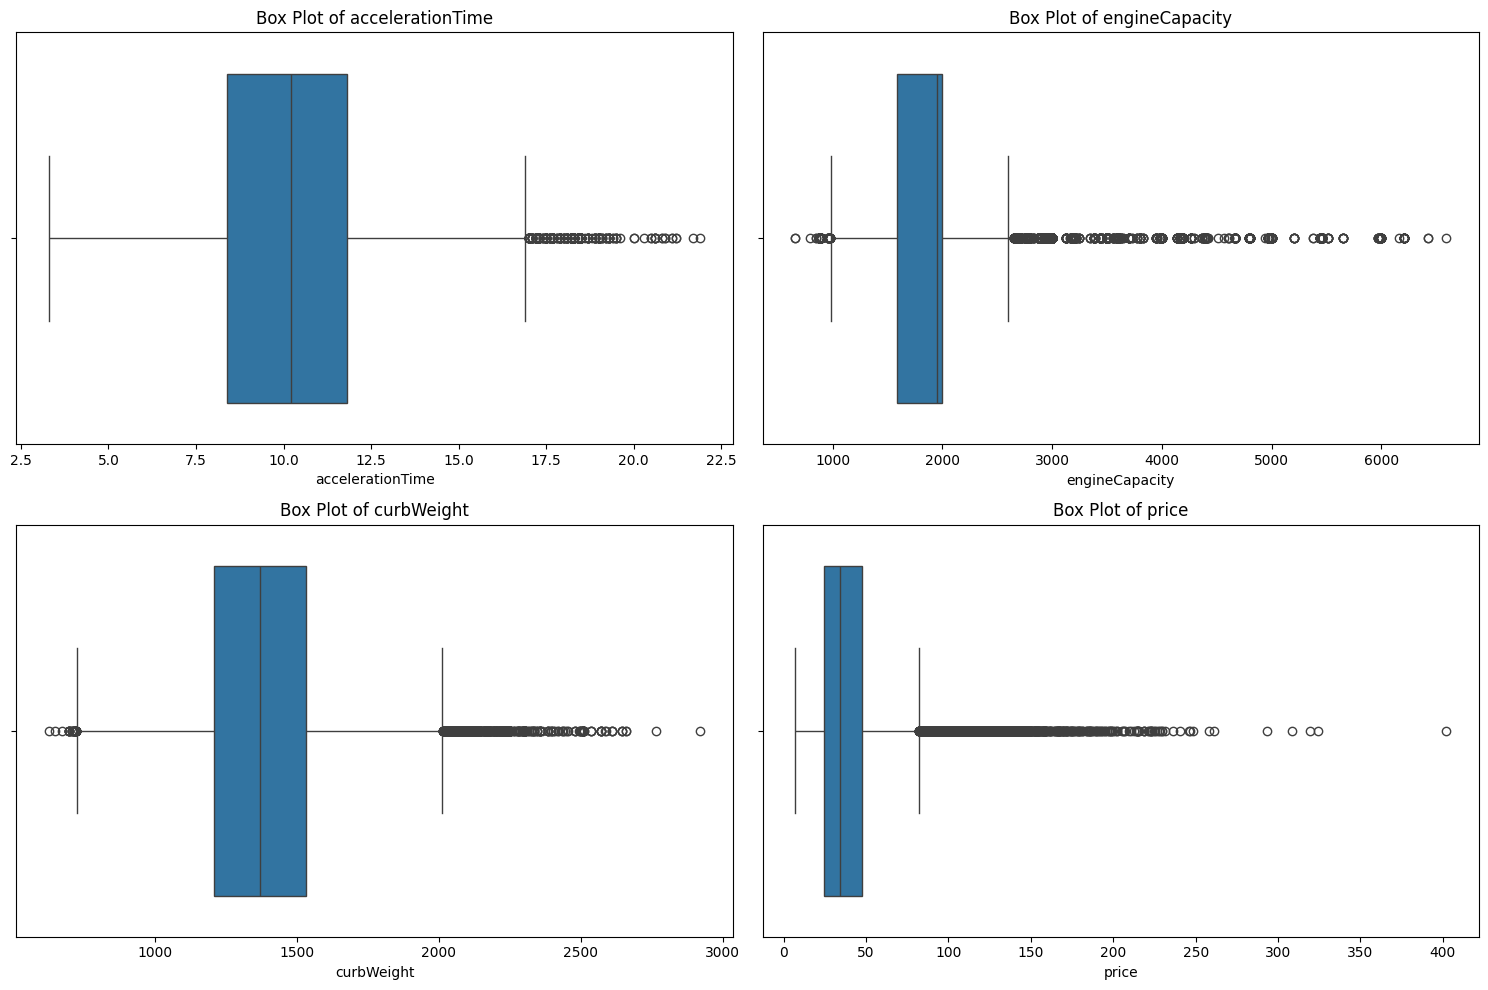

Number of rows after outlier removal: 26304


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cars_data = pd.read_csv('cars_data_10_cleaning.csv')

# Selected columns for visualization and outlier removal
selected_cols = ['accelerationTime', 'engineCapacity', 'curbWeight', 'price']

# Visualizing outliers with box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=cars_data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Identifying and removing outliers using 3 times the IQR
for col in selected_cols:
    Q1 = cars_data[col].quantile(0.25)
    Q3 = cars_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    cars_data = cars_data[(cars_data[col] >= lower_bound) & (cars_data[col] <= upper_bound)]

# Checking the number of rows in the dataset after outlier removal
print("Number of rows after outlier removal:", cars_data.shape[0])


In [ ]:
# save the cleaned dataset
cars_data.to_csv('cars_data_cleaning_17.csv', index=False)